In [22]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import glob

In [30]:
real_data_path = "./RRLyrae/"
real_data_list = sorted(glob.glob(real_data_path + "*.npy"), key=str.lower)
#print(real_data_list)
# sim_data_path = "/home/rodrigo/supernovae_detection/simulated_data/image_sequences/small_set_tfrecord.hdf5"
sim_data_path = "/home/rcarrasco/simulated_data/image_sequences/seeing_test_for_seeing10.hdf5"
sim_data = h5py.File(sim_data_path)

In [31]:
def return_data(path_list, label, sequence_length=20, tensor_length=3):
    network_input_data = {"images": [], "days": [], "lengths": [],
                          "labels": [], "input_seq": [], "input_days": [],
                          "centroids": []}
    
    for info in path_list:
        data = np.load(info, encoding="latin1").item()
        network_input_data["images"].append(data["stamp"])
        network_input_data["centroids"].append(data["centroidsXY"])
        network_input_data["days"].append(data["time"]["MJD"][:sequence_length+tensor_length])
        network_input_data["lengths"].append(sequence_length)
        network_input_data["labels"].append(label)
        input_sequence = []
        input_days = []
        # print(network_input_data["images"][-1].shape)
        for i in range(sequence_length):
            seq = np.arange(start=i, stop=i+tensor_length, step=1)
            # print(seq)
            input_sequence.append(np.moveaxis(network_input_data["images"][-1][seq, ...], 0, -1))
            input_days.append(network_input_data["days"][-1][seq])
            # print(input_sequence[-1].shape)
        network_input_data["input_seq"].append(np.stack(input_sequence, axis=0))
        network_input_data["input_days"].append(np.stack(input_days, axis=0))
        #print(network_input_data["input_days"][-1].shape)
        # print(network_input_data["input_seq"][-1].shape)
    make_numpy_array = ["days", "lengths", "labels", "input_seq", "input_days"]
    for key in make_numpy_array:
        # print("Key "+key)
        network_input_data[key] = np.stack(network_input_data[key], axis=0)
        # print(network_input_data[key].shape)
    network_input_data["n_examples"] = len(network_input_data["labels"])
    return network_input_data

In [32]:
rr_lyrae = return_data(real_data_list, 1)
print(len(rr_lyrae["centroids"]))
print(rr_lyrae["centroids"][0].shape)
rr_lyrae.keys()

111
(26, 2)


dict_keys(['images', 'days', 'lengths', 'labels', 'input_seq', 'input_days', 'centroids', 'n_examples'])

(3099, 2)


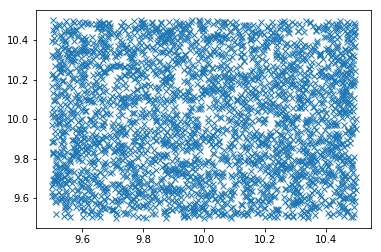

In [33]:
total_centroids = []
for c in rr_lyrae["centroids"]:
    total_centroids.append(c)
total_centroids = np.concatenate(total_centroids, axis=0)
print(total_centroids.shape)
plt.plot(total_centroids[:, 0], total_centroids[:, 1], "x")
#plt.ylim([0, 21])
#plt.xlim([0, 21])
plt.show()

In [34]:
print(list(sim_data["Field01"].keys()))

['count_lightcurves', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']


[ 4.44   4.49   4.42   4.54   4.89   3.92   4.04   3.89   4.52   5.26
  5.31   5.59   4.66   4.62   4.47   4.61   5.86   5.39   9.25  12.37
  7.4    5.09   5.58   5.335  7.28   5.38   5.1    7.01   6.02 ]
1344
510
3.635 16.4


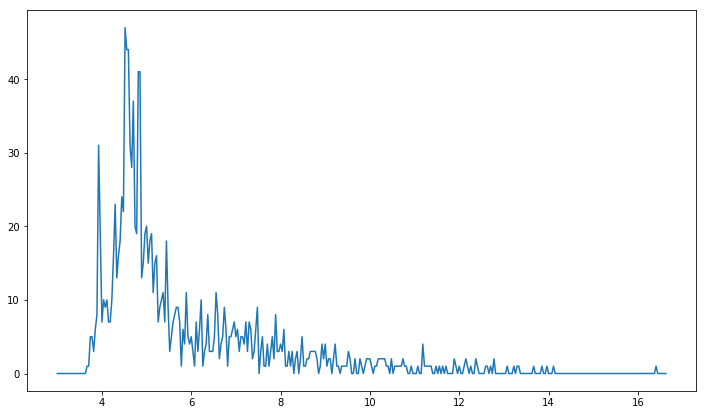

In [35]:
seeing = []
print(sim_data["Field01"]["obs_cond"]["seeing"]["g"][:])
for field in list(sim_data.keys()):
    seeing.append(sim_data[field]["obs_cond"]["seeing"]["g"][:])
seeing = np.concatenate(seeing)
print(len(seeing))
print(len(np.unique(seeing)))
print(np.amin(seeing), np.amax(seeing))
bins = np.arange(start=0.8, stop=4.5, step=0.01)/0.27
h, _ = np.histogram(seeing, bins=bins)
plt.figure(figsize=(12, 7))
plt.plot(bins[1:], h)
plt.show()

In [36]:
const_index = np.where(sim_data["Field04"]["lc_type"][:]=="EclipsingBinaries")[0]
for index in const_index[:30]:
    print(index)
    print(sim_data["Field04"]["lightcurves"]["g"][index, 0])

2
22.105936
4
19.306555
14
18.21191
19
19.983454
26
20.70437
37
21.131777
42
21.656334
51
19.517578
54
21.127558
69
20.864159


In [37]:

sim_data_im = sim_data["Field04"]["images"]["g"][14, :, :, :]
#print(sim_data_im)

26


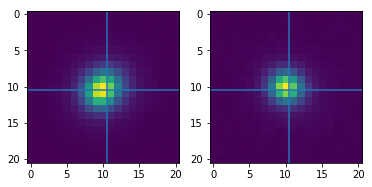

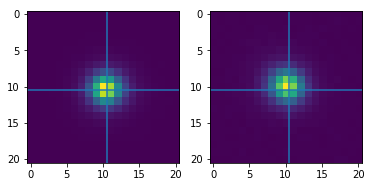

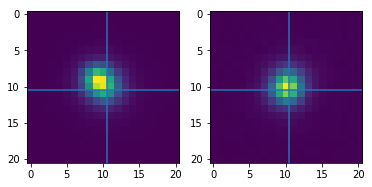

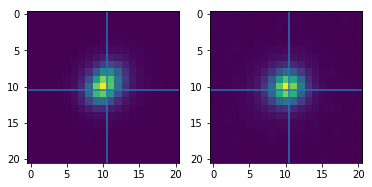

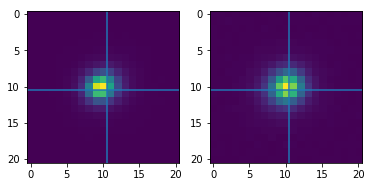

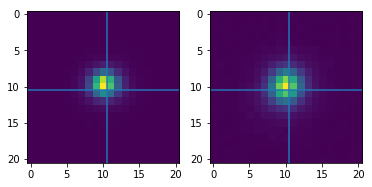

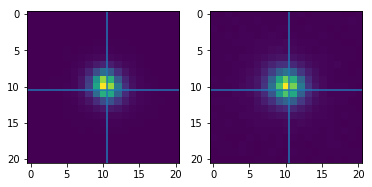

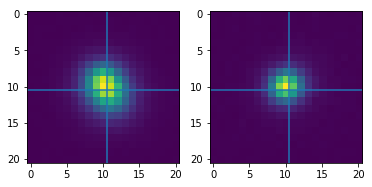

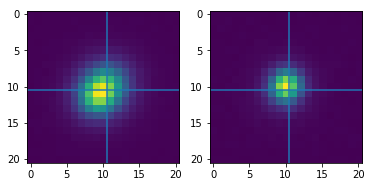

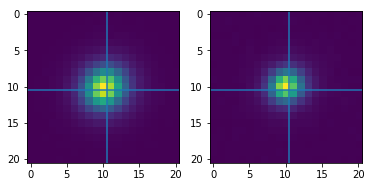

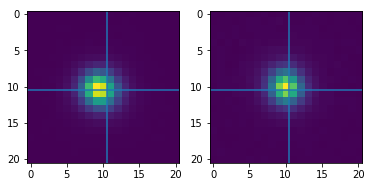

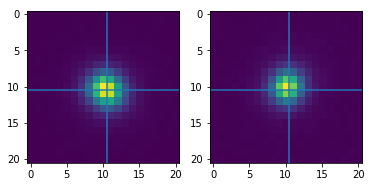

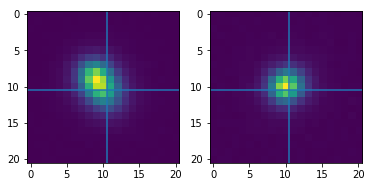

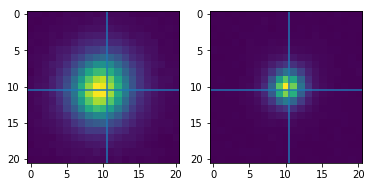

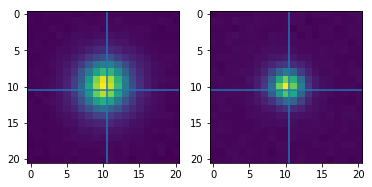

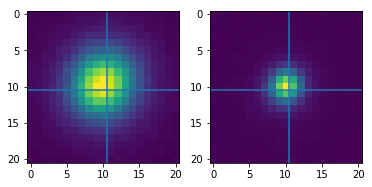

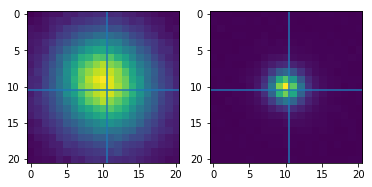

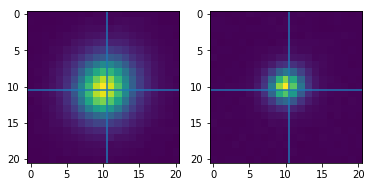

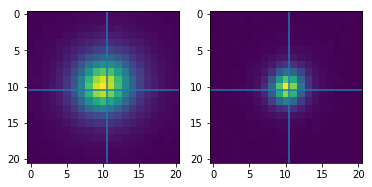

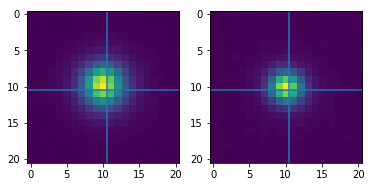

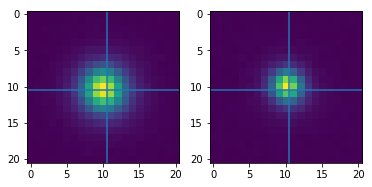

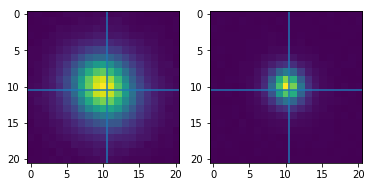

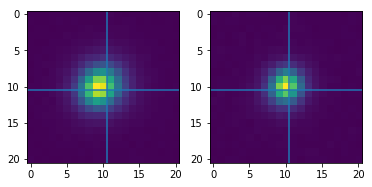

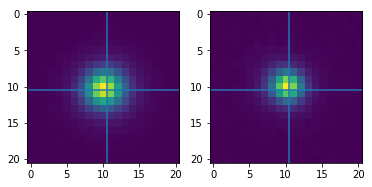

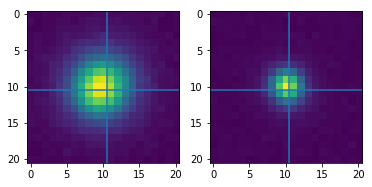

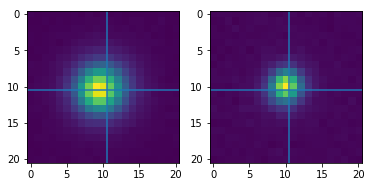

In [38]:
rr_lyrae_index = 0
print(rr_lyrae["images"][rr_lyrae_index].shape[0])
for i in range(rr_lyrae["images"][rr_lyrae_index].shape[0]):
    figure, (ax1, ax2) = plt.subplots(1,2)
    ax1.imshow(rr_lyrae["images"][rr_lyrae_index][i, ...])
    ax1.axvline(x=10.5)
    ax1.axhline(y=10.5)
    ax2.imshow(sim_data_im[:, :, i])
    ax2.axvline(x=10.5)
    ax2.axhline(y=10.5)
    plt.show()